In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from tabulate import tabulate
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
# Create results directory
os.makedirs("results", exist_ok=True)

In [3]:
# Load dataset (Iris dataset)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
# Preprocessing functions
def apply_pca(df, n_components=2):
    pca = PCA(n_components=n_components)
    return pd.DataFrame(pca.fit_transform(df))

def normalize_data(df):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

def transform_data(df):
    return np.log1p(df)  # Log transformation

In [5]:
# Apply different preprocessing techniques
df_no_processing = df.copy()
df_normalized = normalize_data(df)
df_transformed = transform_data(df)
df_pca = apply_pca(df)
df_tn = normalize_data(transform_data(df))  # Transformation + Normalization
df_tn_pca = apply_pca(df_tn)  # Transformation + Normalization + PCA

In [6]:
# Define Clustering Algorithms
def run_clustering(df, num_clusters, algorithm):
    """Run clustering and return evaluation metrics."""
    if algorithm == "K-Means":
        model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    elif algorithm == "Hierarchical":
        model = AgglomerativeClustering(n_clusters=num_clusters)
    elif algorithm == "Mean Shift":
        model = MeanShift()

    labels = model.fit_predict(df)

    # Calculate evaluation metrics
    silhouette = silhouette_score(df, labels) if len(set(labels)) > 1 else np.nan
    calinski = calinski_harabasz_score(df, labels) if len(set(labels)) > 1 else np.nan
    davies = davies_bouldin_score(df, labels) if len(set(labels)) > 1 else np.nan

    return labels, silhouette, calinski, davies

In [7]:
# Define preprocessing methods
preprocessing_methods = {
    "No Data Processing": df_no_processing,
    "Using Normalization": df_normalized,
    "Using Transform": df_transformed,
    "Using PCA": df_pca,
    "Using T+N": df_tn,
    "T+N+PCA": df_tn_pca
}

In [8]:
# Define algorithms
algorithms = ["K-Means", "Hierarchical", "Mean Shift"]
cluster_sizes = [3, 4, 5]  # Different numbers of clusters

In [9]:
# Run clustering experiments
tables = {}
for algorithm in algorithms:
    results = {"Parameters": ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]}

    for method, dataset in preprocessing_methods.items():
        for c in cluster_sizes:
            labels, silhouette, calinski, davies = run_clustering(dataset, c, algorithm)
            col_name = f"{method} (c={c})"
            results[col_name] = [silhouette, calinski, davies]

    # Convert results into DataFrame
    tables[algorithm] = pd.DataFrame(results)

    # Save results as CSV
    tables[algorithm].to_csv(f"results/{algorithm.lower()}_clustering_results.csv", index=False)


In [11]:
# Print Tables with Proper Formatting
for algo, df_table in tables.items():
    print(f"\nUsing {algo} Clustering:\n")
    print(tabulate(df_table, headers='keys', tablefmt='grid'))


Using K-Means Clustering:

+----+-------------------+----------------------------+----------------------------+----------------------------+-----------------------------+-----------------------------+-----------------------------+-------------------------+-------------------------+-------------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+-----------------+-----------------+
|    | Parameters        |   No Data Processing (c=3) |   No Data Processing (c=4) |   No Data Processing (c=5) |   Using Normalization (c=3) |   Using Normalization (c=4) |   Using Normalization (c=5) |   Using Transform (c=3) |   Using Transform (c=4) |   Using Transform (c=5) |   Using PCA (c=3) |   Using PCA (c=4) |   Using PCA (c=5) |   Using T+N (c=3) |   Using T+N (c=4) |   Using T+N (c=5) |   T+N+PCA (c=3) |   T+N+PCA (c=4) |   T+N+PCA (c=5) |
+====+===================+============================+=====

In [13]:
# Graphical Representations
def plot_pca_clusters(df, labels, title):
    plt.figure(figsize=(4, 2))
    sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=labels, palette="Set1", s=50)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

In [20]:
def plot_evaluation_metrics(tables):
    for algo, df_table in tables.items():
        df_table.T.plot(kind="bar", figsize=(4, 2), title=f"Clustering Evaluation Metrics - {algo}")
        plt.xlabel("Preprocessing Methods with Cluster Sizes")
        plt.ylabel("Scores")
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

In [21]:
def plot_dendrogram(df, title):
    plt.figure(figsize=(4, 2))
    linkage_matrix = linkage(df, method='ward')
    dendrogram(linkage_matrix)
    plt.title(title)
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

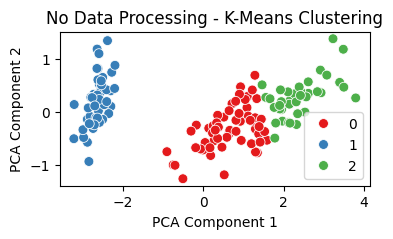

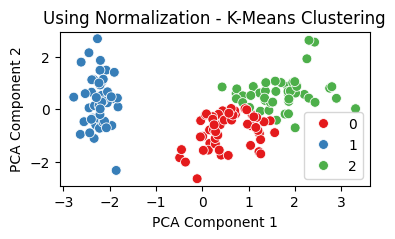

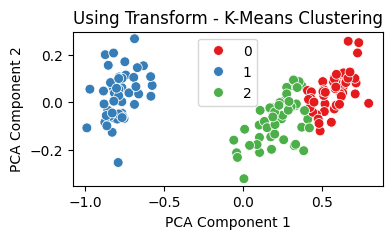

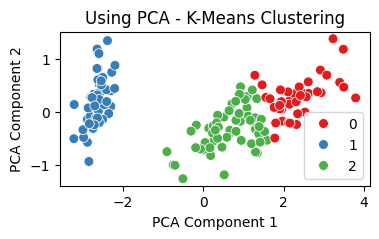

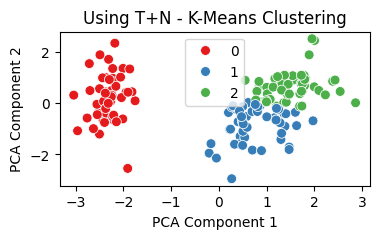

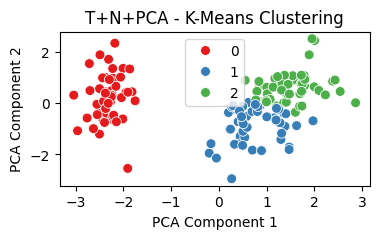

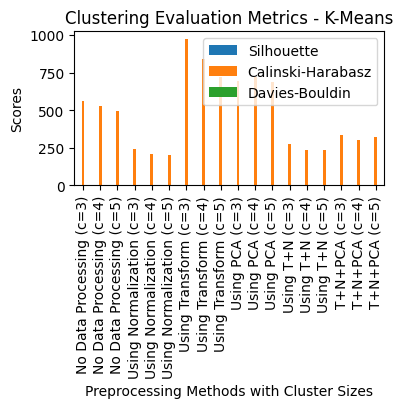

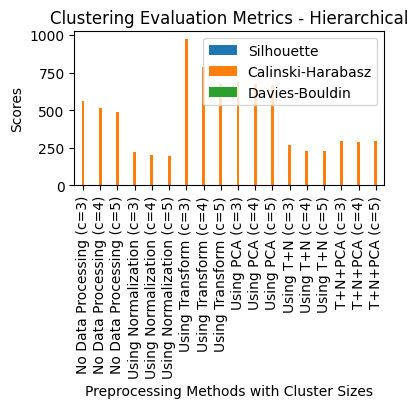

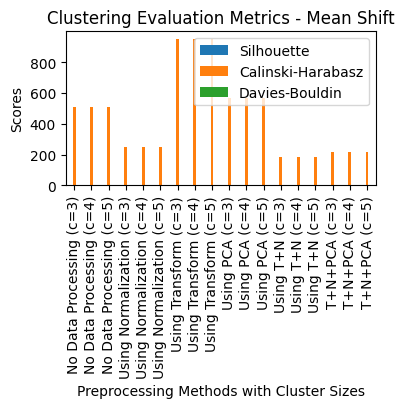

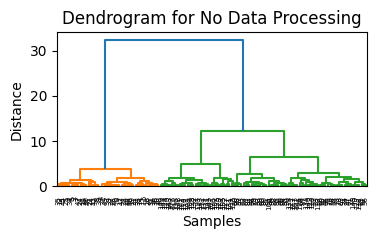

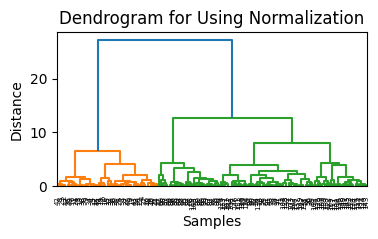

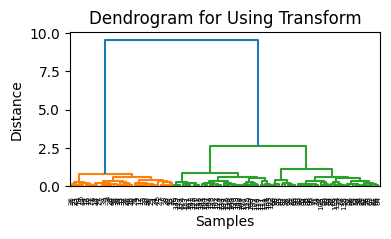

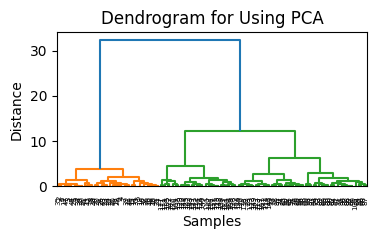

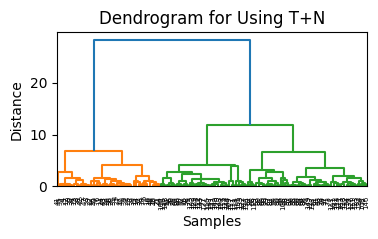

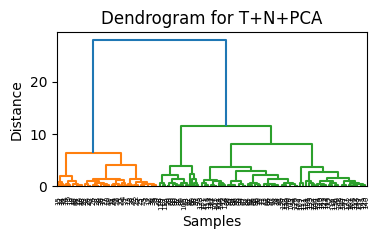

In [22]:
# Run Visualizations
for method, dataset in preprocessing_methods.items():
    labels, _, _, _ = run_clustering(dataset, 3, "K-Means")
    plot_pca_clusters(apply_pca(dataset), labels, f"{method} - K-Means Clustering")

plot_evaluation_metrics(tables)

for method, dataset in preprocessing_methods.items():
    plot_dendrogram(dataset, f"Dendrogram for {method}")
